# Data Vis for the Active Learning

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [3]:

df_p5x5 = pd.read_csv("p++5x5.csv")
df_p10x12 = pd.read_csv("p++10x12.csv")

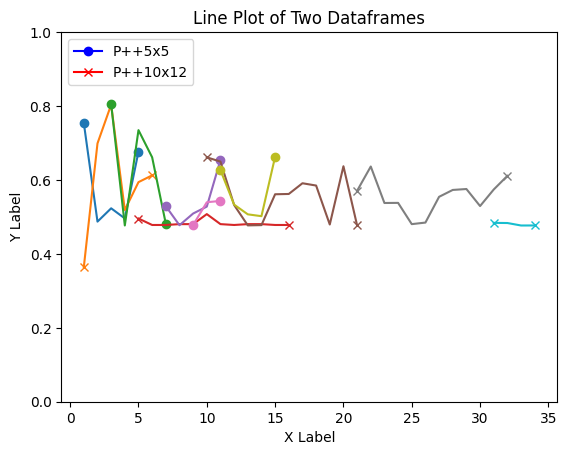

In [14]:
def get_first_last_non_nan_indices(lst):
    non_nan_indices = [i for i, x in enumerate(lst) if not pd.isna(x)]
    if len(non_nan_indices) == 0:
        return None
    return [non_nan_indices[0], non_nan_indices[-1]]


# Create a line plot with markers only at the beginning and end of each series
fig, ax = plt.subplots()
for i in range(1, 6):
    y = df_p5x5[df_p5x5.columns[i]].values
    x = df_p5x5["P++5x5"].values
    # markers_on = [1+x for x in get_first_last_non_nan_indices(y)]
    markers_on = get_first_last_non_nan_indices(y)
    ax.plot(x, y, marker="o", markevery=markers_on, label="P++5x5")

    y = df_p10x12[df_p10x12.columns[i]].values
    x = df_p10x12["P++10x12"].values
    markers_on = get_first_last_non_nan_indices(y)
    ax.plot(x, y, marker="x", markevery=markers_on, label="P++10x12")

# Set axis labels and title
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.title("Line Plot of Two Dataframes")

# Set the y-axis limits
ax.set_ylim([0, 1])

# Create custom legends for each DataFrame
p5x5_legend = plt.Line2D([], [], color="blue", marker="o", label="P++5x5")
p10x12_legend = plt.Line2D([], [], color="red", marker="x", label="P++10x12")
plt.legend(handles=[p5x5_legend, p10x12_legend], loc="upper left", frameon=True)

plt.show()

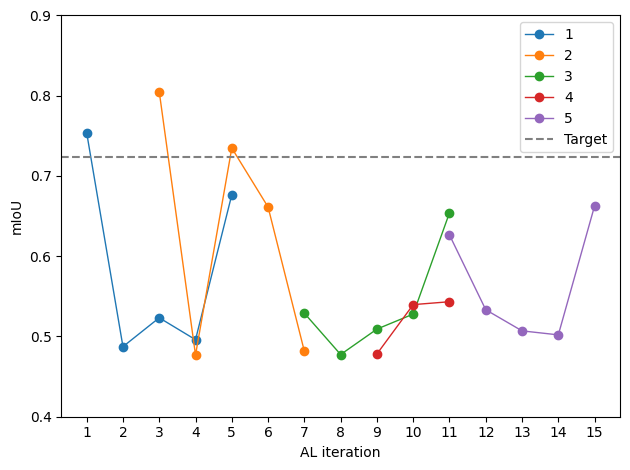

In [4]:
df_p5x5.plot(kind='line', x='P++5x5', y=[1, 2, 3, 4, 5], marker='o', linewidth=1)
plt.xlabel('AL iteration')
plt.ylabel('mIoU')
plt.ylim([0.4, .9])  # Set the y-axis limits

plt.axhline(y=0.724, color='gray', linestyle='--', label='Target') # Add horizontal line at 0.724 and label it

plt.legend() # Show the legend
plt.xticks(np.arange(df_p5x5.shape[0])+1) # Show every label on the x-axis

plt.tight_layout()
plt.show()

<Axes: xlabel='P++10x12'>

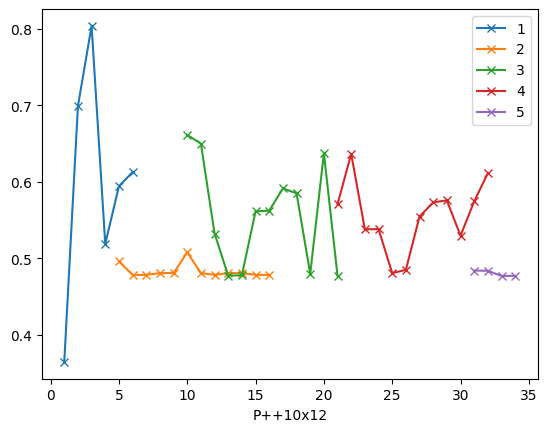

In [5]:
df_p10x12.plot(kind='line', x='P++10x12', y=[1, 2, 3, 4, 5], marker='x')

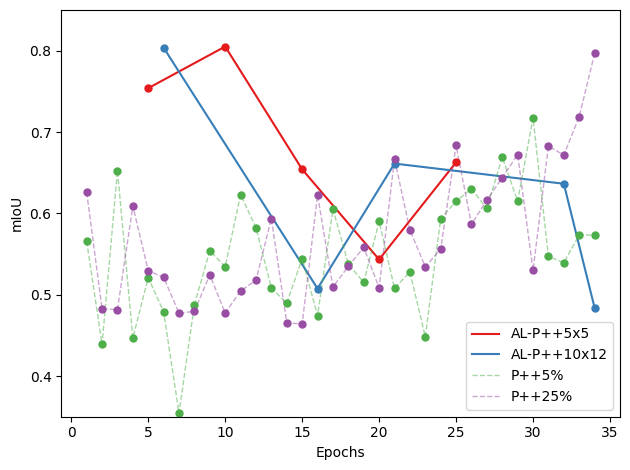

In [29]:
df_al_results_interpolated = pd.read_csv("al_results_interpolated.csv")
df_al_results = pd.read_csv("al_results.csv")

y = ["AL-P++5x5","AL-P++10x12","P++5%","P++25%"]
ax = df_al_results_interpolated.plot(x="Epochs", y=y, linewidth=1.5)

# Define a color palette for the lines and markers
colors = matplotlib.colormaps["Set1"](range(len(y)))

for i, col in enumerate(y):
    df_al_results.plot(
        x="Epochs",
        y=col,
        marker="o",
        markersize=5,
        linestyle="None",
        ax=ax,
        color=colors[i],
        # alpha=0.5,
    )
    ax.lines[i].set_color(colors[i])
    if i > 1:
        ax.lines[i].set_linestyle("--")
        ax.lines[i].set_linewidth(1)
        ax.lines[i].set_alpha(0.5)

plt.xlabel("Epochs")
plt.ylabel("mIoU")
plt.ylim([0.35, .85])  # Set the y-axis limits

# Create a custom legend with one entry per series, ordered by y
handles, labels = ax.get_legend_handles_labels()
order = [labels.index(label) for label in y]
plt.legend(
    [handles[i] for i in order],
    [labels[i] for i in order],
    loc="lower right",
    frameon=True,
)
# # Create a custom legend with one entry per series
# handles, labels = ax.get_legend_handles_labels()
# unique_labels = list(set(labels))
# unique_handles = [handles[labels.index(label)] for label in unique_labels]
# plt.legend(unique_handles, unique_labels, loc="lower right", frameon=True)

plt.tight_layout()
plt.savefig("al_results_p++_interpolated_short-y-axis.pdf")
plt.show()


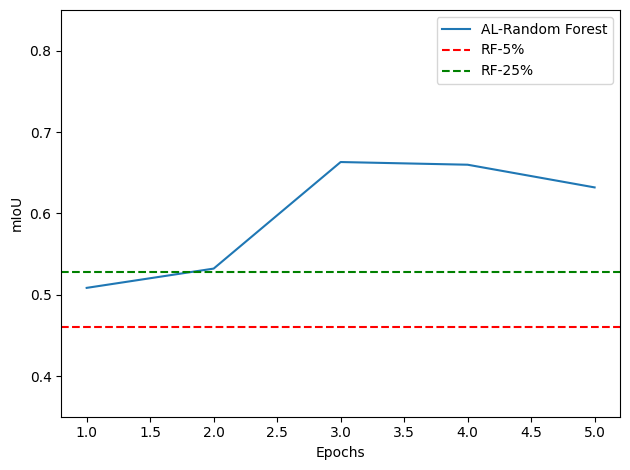

In [22]:
df_al_results = pd.read_csv("al_results.csv")
# Plot the "AL-Random Forest" column
fig, ax = plt.subplots()
df_al_results_interpolated.plot(x="Epochs", y="AL-Random Forest", linewidth=1.5, ax=ax)

# Add horizontal lines at specified values
ax.axhline(y=0.4607, color="r", linestyle="--", label="RF-5%")
ax.axhline(y=0.5276, color="g", linestyle="--", label="RF-25%")

# Set axis labels and legend
ax.set_xlabel("Epochs")
ax.set_ylabel("mIoU")
ax.set_ylim([0.35, 0.85])
ax.legend()

# Save and show the plot
plt.tight_layout()
plt.savefig("random_forest_plot.png")
plt.show()